In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

from vae_interp.analysis import SAEExperimentsResults
from vae_interp.dataset import NpyDataset

/home/ubuntu/.cache/pypoetry/virtualenvs/nouns-mech-interp-YeAXWnnL-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# SAE Experiments
We conducted a hyperparameter sweep on learning rates (1e-4, 1e-5) and l1 weights (1e-2, 5e-3, 1e-3) for training a sparse autoencoder on VAE latents. Here are the results.

In [3]:
sae_experiments_dir = "../checkpoints/sae_experiments2"
sae_experiments = SAEExperimentsResults(sae_experiments_dir)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [07:08<00:00, 71.46s/it]


# Loss Curves
- Total Loss
- Reconstruction Loss
- L1 Loss

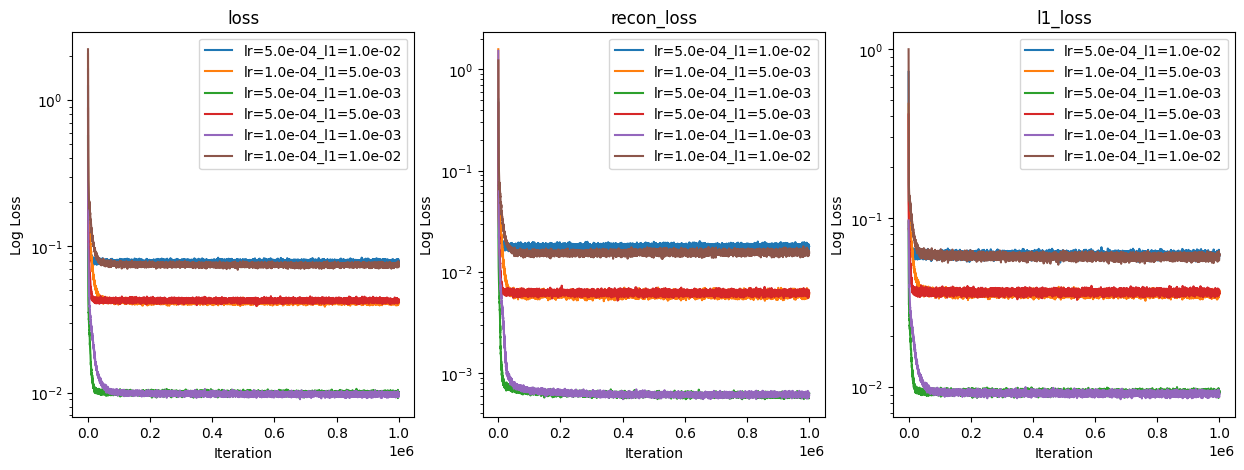

In [8]:
sae_experiments.plot_losses()

# L0 Norm
Measures how "sparse" the SAE is by calculating the average number of nonzero activations across the dataset.

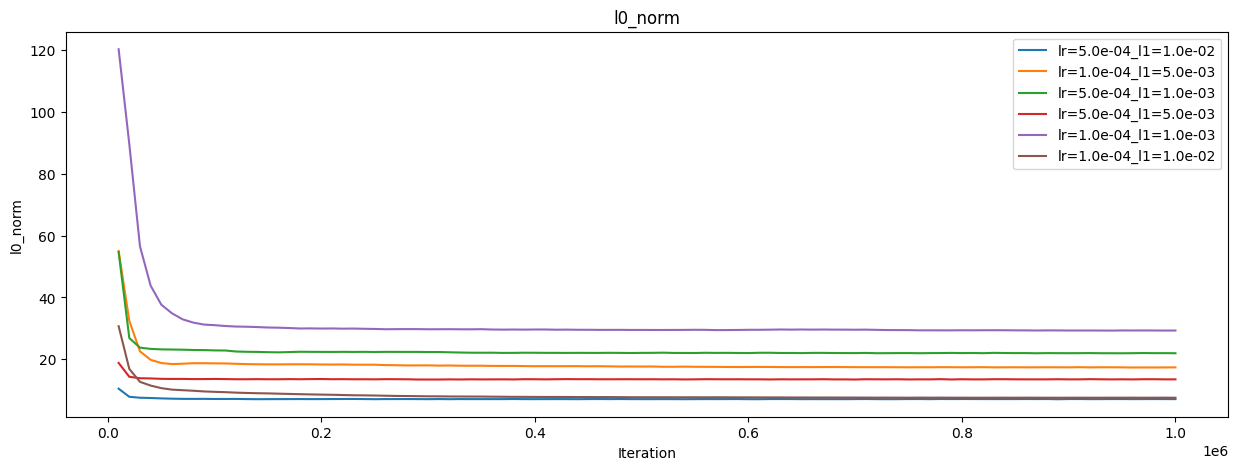

In [9]:
sae_experiments.plot_l0_norms()

# Feature Density Histogram
The learned features from the SAE should activate on a small set of images from the training set. "We define the feature density of each feature as the fraction of tokens on which the feature has a nonzero value." (Anthropic). Here we visualize the feature densities across different SAEs. Empirically, we find that these density histograms are bimodal.

In [10]:
# load dataset
vae_embeddings_path = "../vae_embeddings.npy"
dataset = NpyDataset(vae_embeddings_path)

 33%|███▎      | 127/390 [00:00<00:00, 1256.43it/s]

100%|██████████| 390/390 [00:01<00:00, 208.29it/s] 


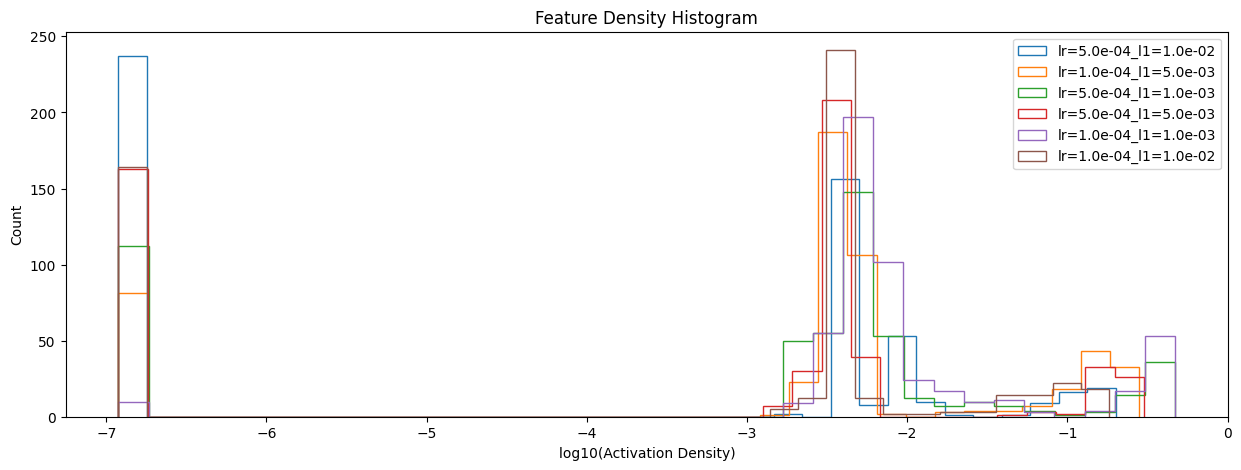

In [11]:
sae_experiments.plot_feature_density_histogram(dataset, bins=35)

# Dead Neurons
How many features do not activate at all

 33%|███▎      | 128/390 [00:00<00:00, 1279.14it/s]

100%|██████████| 390/390 [00:01<00:00, 209.11it/s] 


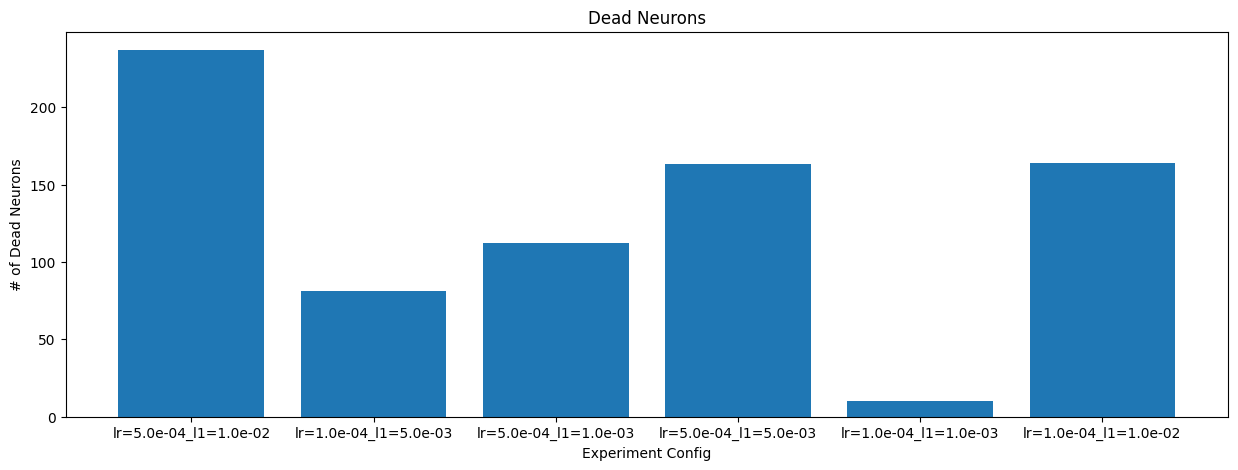

In [12]:
sae_experiments.plot_dead_features(dataset)